In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('data/student.csv')

data.head(5)



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data['AverageScore'] = (data['math score']+data['reading score']+data['writing score'])/3
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [5]:
data['gender'].dtype

dtype('O')

In [6]:

cat_col = [i for i in data.columns if data[i].dtype == 'O']
cat_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [7]:
num_col = [i for i in data.columns if data[i].dtype != 'O']
num_col = ['math score', 'reading score', 'writing score']
num_col

['math score', 'reading score', 'writing score']

In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
AverageScore                   0
dtype: int64

In [9]:
# there are no missing value

In [10]:
data.duplicated().sum()


0

In [11]:
# there are no duplicate colums

In [12]:
data.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
AverageScore                   194
dtype: int64

In [13]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

gender
female    518
male      482
Name: gender, dtype: int64

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64

test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64

math score
65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

reading score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64

writing score
74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
AverageScore,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


In [15]:
data.corr()

,math score,reading score,writing score,AverageScore
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
AverageScore,0.918746,0.970331,0.965667,1.000000


<AxesSubplot:>

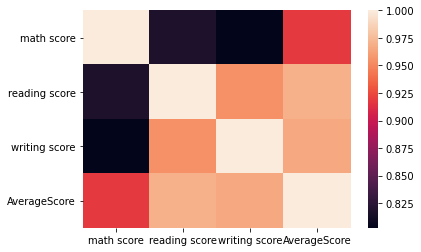

In [16]:
sns.heatmap(data.corr())

In [17]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
AverageScore    -0.299057
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

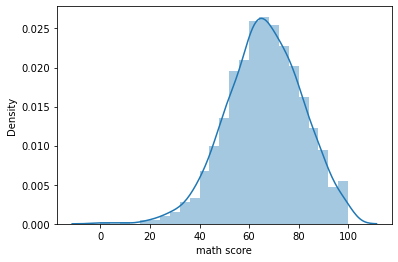

In [18]:
sns.distplot(data['math score'])

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)


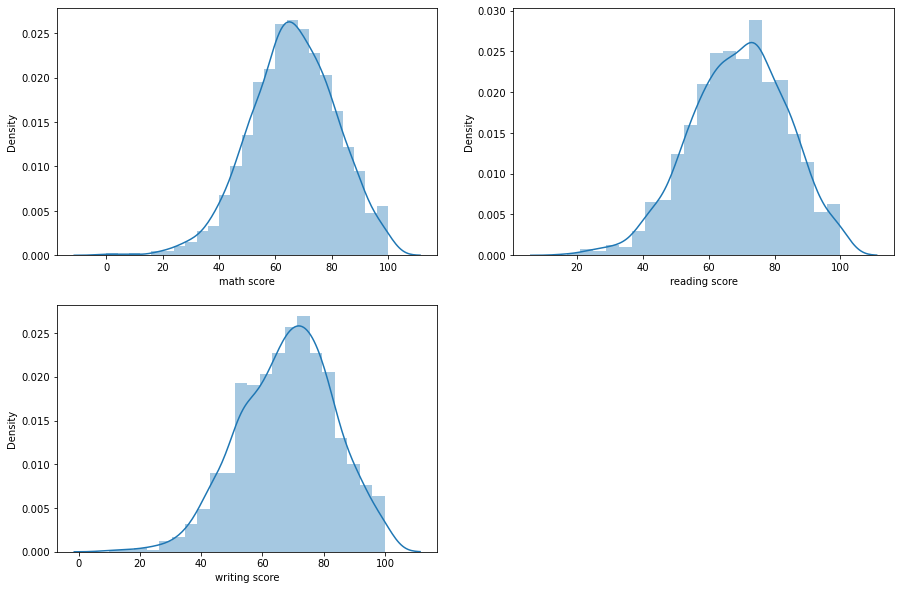

In [19]:

plt.figure(figsize=(15,10))
for i in enumerate(num_col):
    plt.subplot(2,2,i[0]+1)
    print(sns.distplot(data[i[1]]))
    

In [20]:
data.cov()

,math score,reading score,writing score,AverageScore
math score,229.918998,180.998958,184.939133,198.619030
reading score,180.998958,213.165605,211.786661,201.983741
writing score,184.939133,211.786661,230.907992,209.211262
AverageScore,198.619030,201.983741,209.211262,203.271344


In [21]:
abc = data[data["math score"] < 30].count()
abc

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
AverageScore                   14
dtype: int64

In [22]:
data_num = data[num_col]
data_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [23]:
from scipy.stats import normaltest

In [24]:
pValueMathScore = normaltest(data_num['math score'])[1]*100
pValueReadingScore = normaltest(data_num['reading score'])[1]*100
pValueWritingScore = normaltest(data_num['writing score'])[1]*100

# since pValue is less than 0.05 hence data is not normally distributed(log normally distributed).
# however the above data is close to 0.05 

print("pValueMathScore: " + str(pValueMathScore))
print("pValueReadingScore: " + str(pValueReadingScore))
print("pValueWritingScore: " + str(pValueWritingScore))


pValueMathScore: 0.04508029386993784
pValueReadingScore: 0.3853758403576582
pValueWritingScore: 0.11101885439899974


AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)


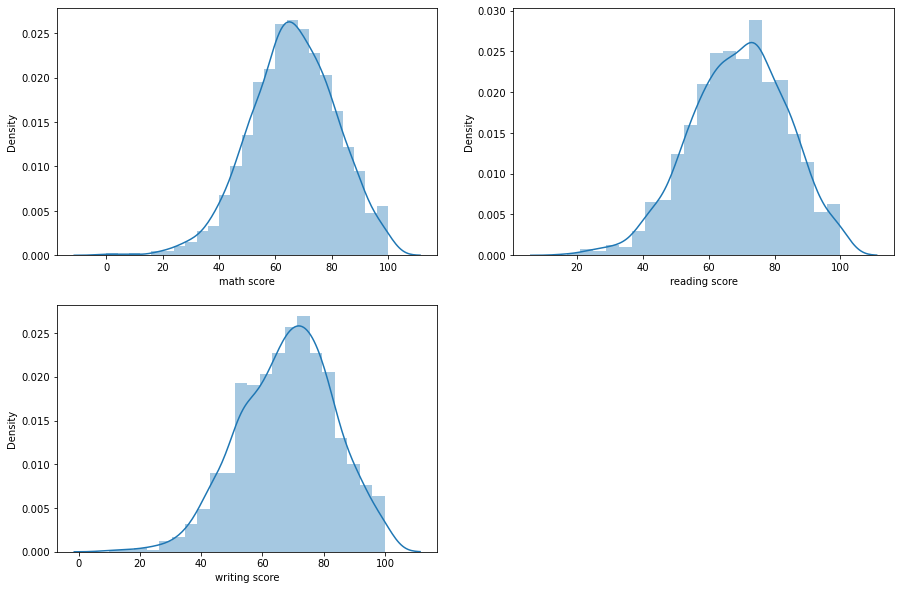

In [25]:

plt.figure(figsize=(15,10))
for i in enumerate(num_col):
    plt.subplot(2,2,i[0]+1)
    print(sns.distplot(data[i[1]]))
    

In [32]:
data['math score'].quantile(0.10)

47.0

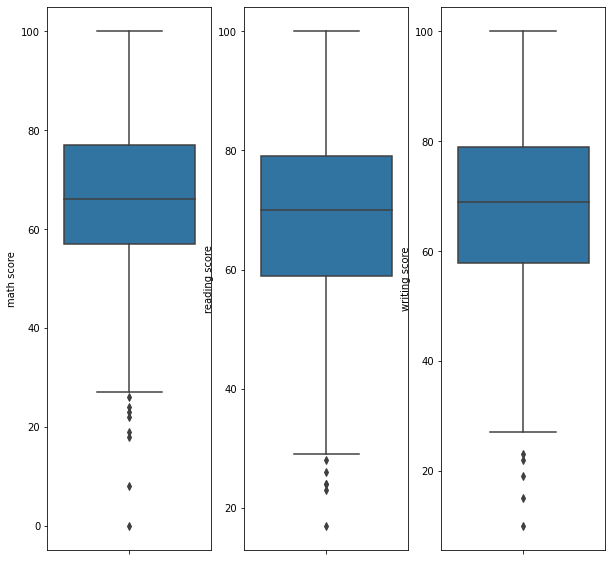

In [27]:
plt.figure(figsize=(10,10))
for i in enumerate(data_num):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(y=data_num[i[1]])

In [28]:

def identifying_treating_outliers(df,col,remove_or_fill_with_quartile):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_fence=q1-1.5*(iqr)
  upper_fence=q3+1.5*(iqr)
  if remove_or_fill_with_quartile=="drop":
    df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
    df.drop(df.loc[df[col]>upper_fence].index,inplace=True)
  elif remove_or_fill_with_quartile=="fill":
    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])


identifying_treating_outliers(df= data_num ,col= 'math score',remove_or_fill_with_quartile= 'drop')


In [29]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333
